# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

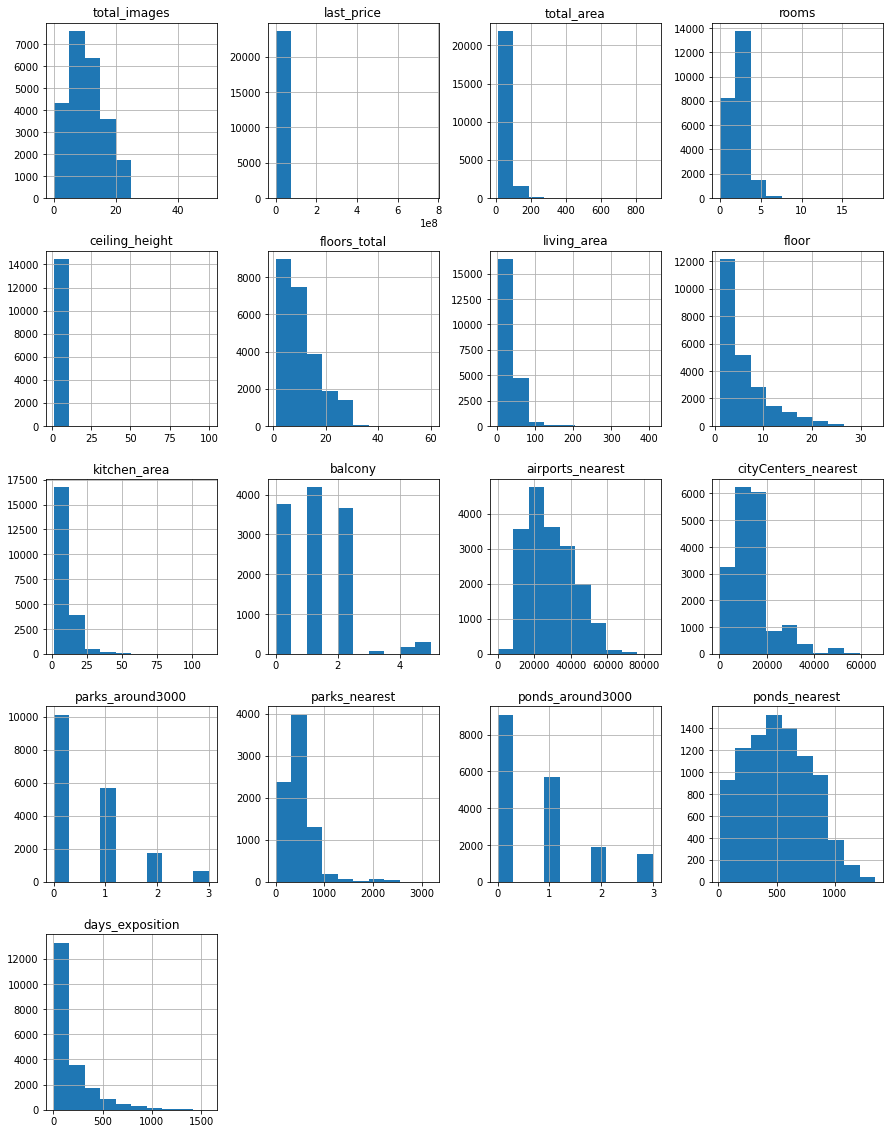

In [3]:
data.hist(figsize=(15, 20))

In [4]:
pd.set_option('display.max_columns', None) # Увидеть все столбцы
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


In [6]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


***Обозначения:***

- total_images — число фотографий квартиры в объявлении
- last_price — финальная цена
- total_area — площадь квартиры в квадратных метрах
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков в метрах
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах
- floor — этаж квартиры
- is_apartment — апартаменты
- studio - студия
- open_plan - свободная планировка
- kitchen_area — площадь кухни в квадратных метрах
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах
- cityCenters_nearest — расстояние до центра города в метрах
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка в метрах
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

***Всего 23699 строки****

In [7]:
data.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

***Больше всего пропусков в столбце 'is_apartment'***

***Скорее все из за необязательной строки при составлении анкеты или же не знания что такое апартаменты***

***В столбце balcony, присутствуют значения и 0 и NaN.***

***В столбце 'ceiling_height' присутствуют анамалии ввиду ручного ввода***

***Пропуски в 'cityCenters_nearest' скорее всего связанны с расположением квартир в посёлках и т.д.***

***Пропуски в 'airports_nearest' вероятны из за отсутсвия аэропортов 'поблизости'***

***Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.***

### Предобработка данных

***Изменим типы данных в некоторых строках на целочисленные значения и булевы значения, а так же приведём формат вывода даты и времени к удобному для форматирования и обработки***

In [8]:
# Дата и время
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [9]:
# Апартаменты
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)
display(data['is_apartment'], data['is_apartment'].unique())

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

array([False,  True])

In [10]:
# Балкон
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
display(data['balcony'], data['balcony'].unique())

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

array([0, 2, 1, 5, 4, 3])

In [11]:
# Стоимость на момент продажи
data['last_price'] = data['last_price'].astype(int)
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [12]:
# Неявные дубли в названиях 
nosorted_local_name = set(data['locality_name'].unique())
display(len(nosorted_local_name))
nosorted_local_name

365

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

In [13]:
data.locality_name = data.locality_name.str.replace('ё', 'е')
data.locality_name = data.locality_name.str.replace('поселок городского типа', 'поселок')
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок')
data.locality_name = data.locality_name.str.replace('при железнодорожной станции', 'станции')

# КТ и поселок оставлю без изменений 

sorted_locality_name = set(data['locality_name'].unique())

# После удаления

display(len(sorted_locality_name))
display(sorted_locality_name)

321

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинк

In [14]:
# Потолки
data['ceiling_height'].median()
data['ceiling_height'].loc[data['ceiling_height'].isna()] = data['ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
data['ceiling_height']

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

In [16]:
# Названия НП
data['locality_name'].isna().sum()

49

In [17]:
data.dropna(subset=['locality_name'],inplace=True)
data['locality_name'].isna().sum()

0

In [18]:
# Сколько висело объявление 
display(data['days_exposition'].isna().sum())
data['days_exposition'].loc[data['days_exposition'].isna()] = data['days_exposition'].median()
data['days_exposition'] = data['days_exposition'].astype(int)
display(data['days_exposition'])
data['days_exposition'].isna().sum()

3180

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0         95
1         81
2        558
3        424
4        121
        ... 
23694     95
23695     45
23696     95
23697    602
23698     95
Name: days_exposition, Length: 23650, dtype: int64

0

In [19]:
# Парки 
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median()).astype(int)
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].mean()).astype(int)
display(data['parks_around3000'])
display(data['parks_nearest'])

0        1
1        0
2        1
3        2
4        2
        ..
23694    1
23695    0
23696    0
23697    2
23698    0
Name: parks_around3000, Length: 23650, dtype: int64

0        482
1        490
2         90
3         84
4        112
        ... 
23694    796
23695    490
23696    490
23697    173
23698    490
Name: parks_nearest, Length: 23650, dtype: int64

In [20]:
# Пруды 
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median()).astype(int)
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].mean()).astype(int)
display(data['ponds_around3000'])
display(data['ponds_nearest'])

0        2
1        0
2        2
3        3
4        1
        ..
23694    3
23695    1
23696    1
23697    3
23698    1
Name: ponds_around3000, Length: 23650, dtype: int64

0        755
1        518
2        574
3        234
4         48
        ... 
23694    381
23695    518
23696    518
23697    196
23698    518
Name: ponds_nearest, Length: 23650, dtype: int64

In [21]:
# Этажи в доме
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)
display(data['floors_total'].isna().sum())
display(data['floors_total'])

0

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23565, dtype: int64

In [22]:
# Кухни и ЖП
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
display(data['living_area'])
display(data['kitchen_area'])

0        51.000000
1        18.600000
2        34.300000
3        90.816648
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    43.837596
23698    12.300000
Name: living_area, Length: 23565, dtype: float64

0        25.000000
1        11.000000
2         8.300000
3        27.836861
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696     9.926730
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23565, dtype: float64

***Вывод***

***По результату проведённой обработки данных, можно сказать что довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует. Об этом обязательно необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных.***

### Добавьте в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [23]:
# Цена одного квадратного метра
data['price_for_meter'] = data['last_price']/data['total_area']
data['price_for_meter'] = data['price_for_meter'].astype(int)
display(data['price_for_meter'])
display(data['price_for_meter'].mean())

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_for_meter, Length: 23565, dtype: int64

99405.39104604286

***Средняя цена за кв.метр составляет 100 тыс.руб***

In [24]:
# День недели публикации объявления
data['day_of_week_exposition']= data['first_day_exposition'].dt.weekday
data['month_exposition']=data['first_day_exposition'].dt.month
data['years_exposition']=data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_of_week_exposition,month_exposition,years_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,95,120370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0,490,0,518,81,82920,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558,92785,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.816648,9,False,False,False,27.836861,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424,408176,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121,100000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796,3,381,95,72490,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,0,490,1,518,45,52542,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,9.926730,0,село Рождествено,NaN,NaN,0,490,1,518,95,44091,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.837596,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173,3,196,602,149511,1,3,2017


In [25]:
# Тип этажа квартиры
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_of_week_exposition,month_exposition,years_exposition,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,95,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0,490,0,518,81,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.816648,9,False,False,False,27.836861,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121,100000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796,3,381,95,72490,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,0,490,1,518,45,52542,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,9.926730,0,село Рождествено,NaN,NaN,0,490,1,518,95,44091,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.837596,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173,3,196,602,149511,1,3,2017,другой


In [26]:
# Расстояние до центра города в километрах
distance = data.query('locality_name == "Санкт-Петербург"')
distance = distance.dropna(subset = ['cityCenters_nearest'], inplace = False)
distance['cityCenters_nearest_km'] = distance.loc[:, 'cityCenters_nearest'] / 1000
distance['cityCenters_nearest_km'] = distance['cityCenters_nearest_km'].round()
flat_distance = distance['price_for_meter'].mean()
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_of_week_exposition,month_exposition,years_exposition,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,95,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0,490,0,518,81,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.816648,9,False,False,False,27.836861,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121,100000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1,796,3,381,95,72490,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,0,490,1,518,45,52542,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,9.926730,0,село Рождествено,NaN,NaN,0,490,1,518,95,44091,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.837596,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2,173,3,196,602,149511,1,3,2017,другой


***Вывод***

По результату проведённого анализа нелья не заметить, что активные продажи жилья начались с 2017 года, а предложения первого и последнего этажей в сумме по количеству объявлений уступает любому другому больше чем в три раза от всего количества объявлений. В среднем жилая площадь предложенных квартир знимает всего половину от общей площади, в то время как площадь кухни доходит до 20% от общей площади. И при всём при этом средняя цена за кв.метр достигает 100 тыс.руб.

In [27]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

### Проведите исследовательский анализ данных

Общая площадь:
Данные распределены нормально, есть выбросы но они не сильно влияют на данные.

Цена:
Данные также распределены нормально, видны выбросы, но они также не сильно влияют на результат, общая картина ясна. 

Число комнат:
На гистограмме видно, что бóльшее кол-во объявлений – это квартиры с 1 или 2 комнатами. Квартир с 7 комнатами как и ожидалось меньше всех. Распределение нормальное. 

Высота потолков:
Выбросы не сильно влияют на распределение. Данные нормальные и представляют собой понятную картину относительно высоты потолков.

Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).

Комнаты. В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.

Высота потолков в центре выше в среднем на 12 сантиметров.

Вывод
Зависимость от дня, месяца и года
День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.
Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.

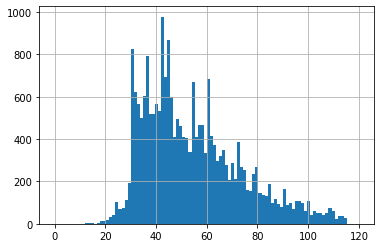

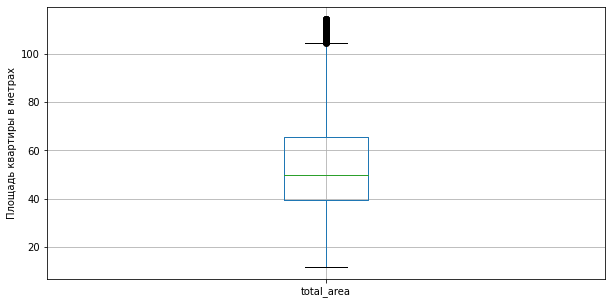

In [28]:
# Общая площадь
data['total_area'].hist(bins=100,range=(0,120))
plt.show()
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

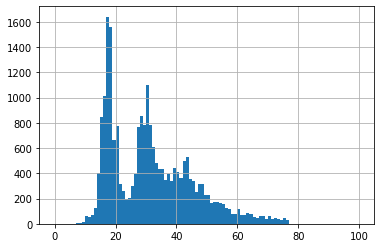

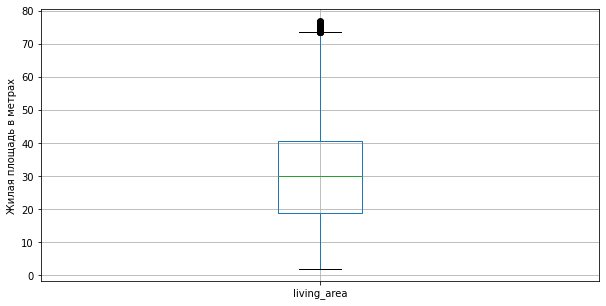

In [29]:
# Жилая площадь
data['living_area'].hist(bins=100,range=(0,100))
plt.show()
data.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.ylabel('Жилая площадь в метрах')
plt.show()

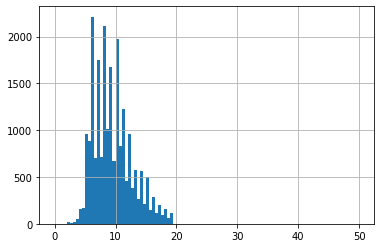

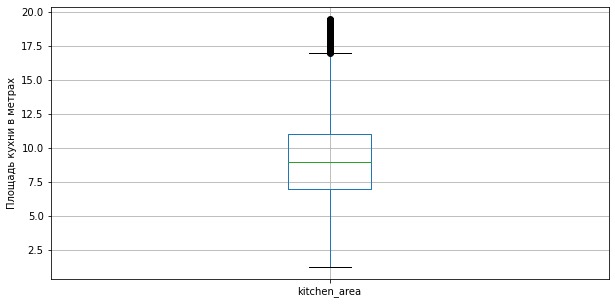

In [30]:
# Площадь кухни
data['kitchen_area'].hist(bins=100,range=(0,50))
plt.show()
data.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь кухни в метрах')
plt.show()

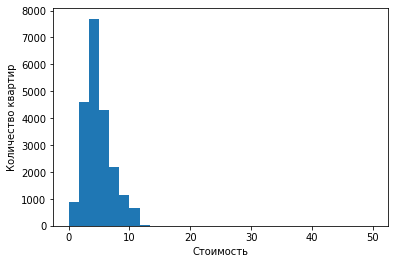

In [31]:
# Цена объекта
plt.hist(data['last_price'] / 1000000, bins=30, range=(0,50))
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

'Число комнат'

count    23371.000000
mean         2.030208
std          0.973563
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

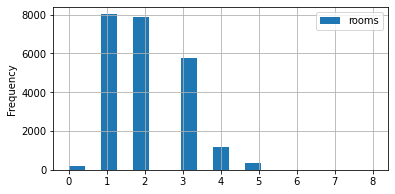

In [32]:
# Число комнат 
data.plot(y = 'rooms', kind = 'hist',range=(0,8), bins = 19, grid=True, figsize = (6,3))
display('Число комнат',data['rooms'].describe())

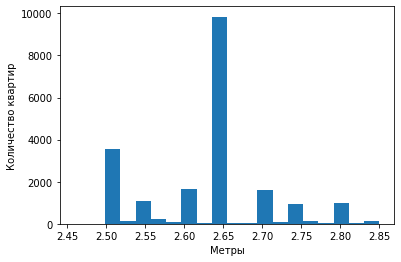

In [33]:
# Высота потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

'Этаж квартиры'

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

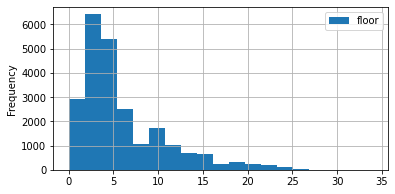

In [34]:
# Этаж квартиры
data.plot(y = 'floor', kind = 'hist',range=(0,34), bins = 19, grid=True, figsize = (6,3))
display('Этаж квартиры',data['floor'].describe())

'Тип этажа'

count      23565
unique         3
top       другой
freq       17326
Name: floor_category, dtype: object

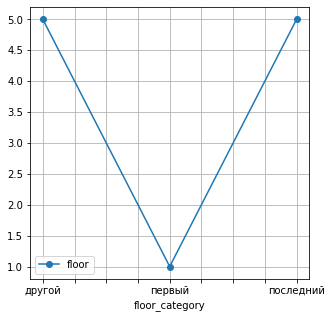

In [35]:
# Тип этажа квартиры 
data.pivot_table(index='floor_category', values='floor', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
display('Тип этажа',data['floor_category'].describe())

'#число комнат'

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

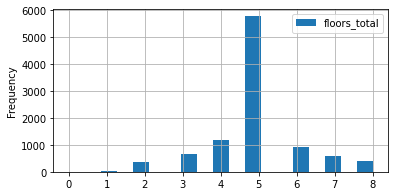

In [36]:
# Общее количество этажей в доме
data.plot(y = 'floors_total', kind = 'hist',range=(0,8), bins = 19, grid=True, figsize = (6,3))
display('#число комнат',data['floors_total'].describe())

'Расстояние до центра города'

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

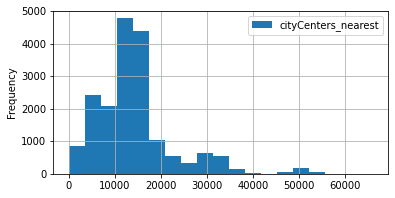

In [37]:
# Расстояние до центра города в метрах
data.plot(y = 'cityCenters_nearest', kind = 'hist',range=(1,66000), bins = 19, grid=True, figsize = (6,3))
display('Расстояние до центра города',data['cityCenters_nearest'].describe())

'Расстояние до ближайшего аэропорта'

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

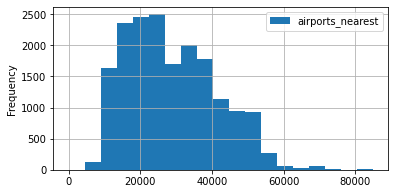

In [38]:
# Расстояние до ближайшего аэропорта
data.plot(y = 'airports_nearest', kind = 'hist',range=(1,85000), bins = 19, grid=True, figsize = (6,3))
display('Расстояние до ближайшего аэропорта',data['airports_nearest'].describe())

'Расстояние до ближайшего парка'

count    23565.000000
mean       490.197793
std        199.383912
min          1.000000
25%        490.000000
50%        490.000000
75%        490.000000
max       3190.000000
Name: parks_nearest, dtype: float64

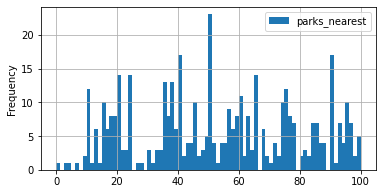

In [39]:
# Расстояние до ближайшего парка
data.plot(y = 'parks_nearest', kind = 'hist',range=(0,100), bins = 80, grid=True, figsize = (6,3))
display('Расстояние до ближайшего парка',data['parks_nearest'].describe())

'День публикации объявления'

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week_exposition, dtype: float64

'Месяц публикации объявления'

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

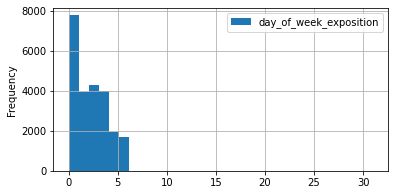

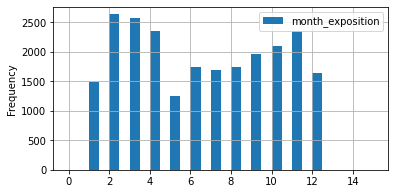

In [40]:
# День и месяц публикации объявления
data.plot(y = 'day_of_week_exposition', kind = 'hist',range=(0,31), bins = 30, grid=True, figsize = (6,3))
display('День публикации объявления',data['day_of_week_exposition'].describe())

data.plot(y = 'month_exposition', kind = 'hist',range=(0,15), bins = 30, grid=True, figsize = (6,3))
display('Месяц публикации объявления',data['month_exposition'].describe())

count    21228.000000
mean       112.794564
std         96.371987
min          1.000000
25%         45.000000
50%         95.000000
75%        146.000000
max        427.000000
Name: days_exposition, dtype: float64

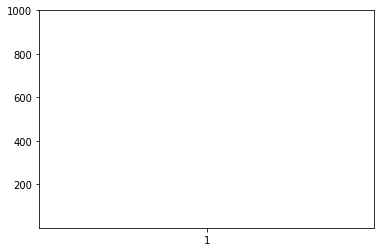

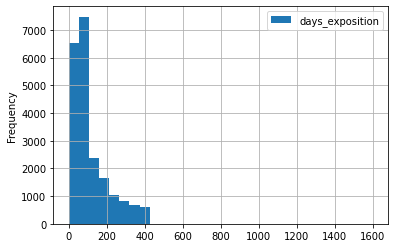

In [41]:
# Как быстро продавались квартиры
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (0,1600))
data[data['days_exposition']!=0]['days_exposition'].describe()

***Вывод:*** никаких общих особенностей в обьявлениях, снятых через 45 дней не выявлено, потому будем убирать эти данные из наших расчетов, как и данные с 60, 90, 30 и 7 дней в столбце days_exposition, так как это аномалии.

До того, как мы очистим наши данные от аномалий, нам нужно дать ответ на вопрос, какое количество дней считать нормальным, а какое выбросом на текущий момент до очистки данных. Исходя из метода describe, межквартильный размах - от 45 до 232 дней, исходя же из метода boxplot - диаграмма размаха у нас от минимального значения до примерно 500 дней. Значит необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Значит нормальные значения у нас лежат от 1 до 500.

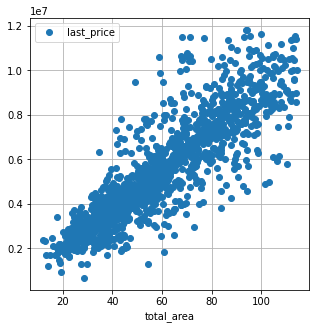

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.905372
total_area    0.905372    1.000000 



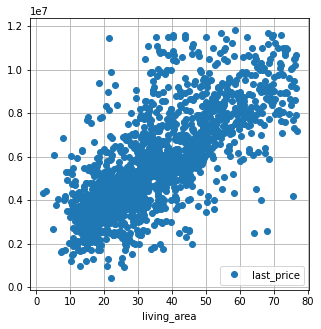

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.729359
living_area    0.729359     1.000000 



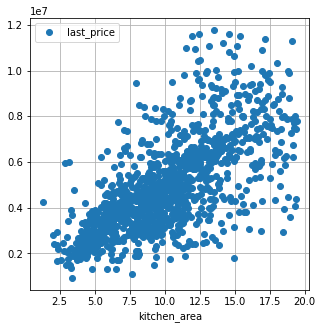

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.445313
last_price        0.445313    1.000000 



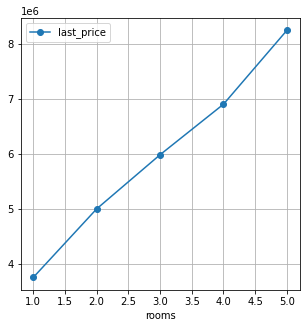

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.537551
rooms         0.537551  1.000000 



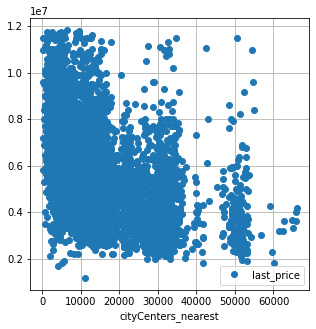

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.712077
last_price                      0.712077    1.000000 



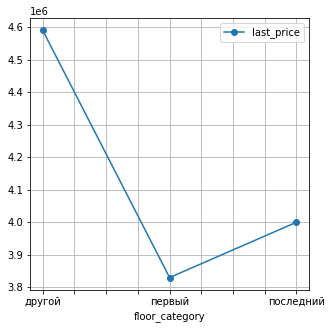

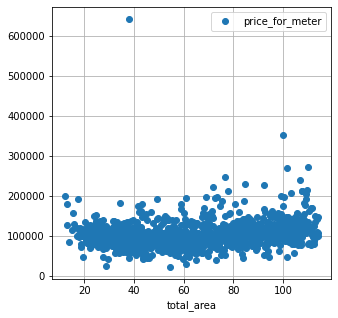

Корреляция цены за квадрат и площади: 

                 price_for_meter  total_area
price_for_meter         1.000000    0.047401
total_area              0.047401    1.000000 



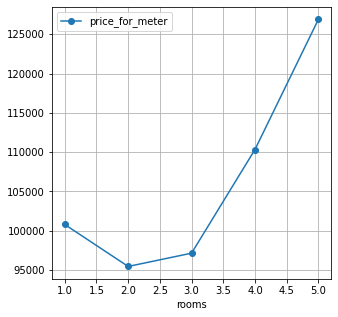

Корреляция цены за квадрат и числа комнат: 

                 price_for_meter     rooms
price_for_meter         1.000000 -0.263158
rooms                  -0.263158  1.000000 



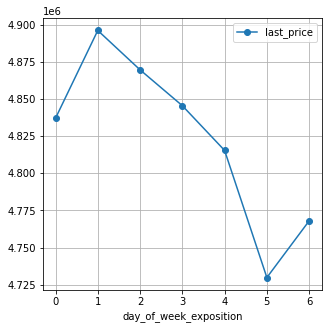

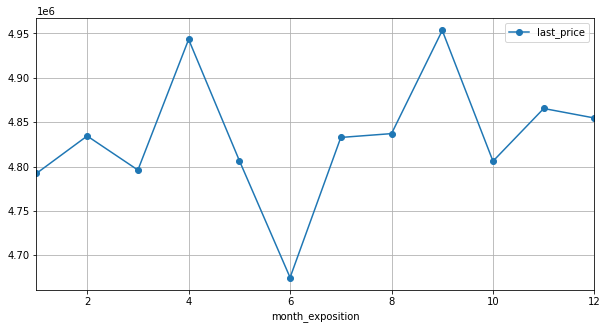

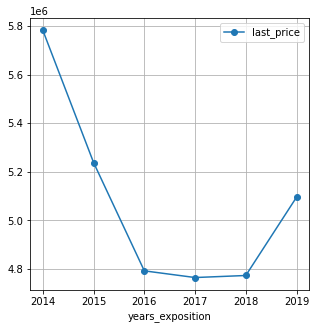

In [42]:
# Какие факторы больше всего влияют на общую (полную) стоимость объекта?
# Зависимость цены от площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от жилой площади
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

# Зависимость цены от площади кухни
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
data.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

# Зависимость цены за квадрат от площади
data.pivot_table(index='total_area', values='price_for_meter').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'price_for_meter']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
data.query('rooms > 0').pivot_table(index='rooms', values='price_for_meter').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'price_for_meter']).corr(),'\n')

# Зависимость от дня размещения
data.pivot_table(index='day_of_week_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

# Зависимость от месяца размещения
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()

# Зависимость от года размещения
data.pivot_table(index='years_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

***Вывод***

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.

Зависимость от дня, месяца и года
День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.
Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

***Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***

In [43]:
# Средняя стоимость квадратного метра
med_cost_up = data['locality_name'].value_counts().head(10)
med_cost_up_index = data.query('locality_name in (@med_cost_up.index)').pivot_table(values='price_for_meter', index='locality_name')
med_cost_up_index = med_cost_up_index.astype(int)
display(med_cost_up_index.sort_values('price_for_meter', ascending=False))

med_cost_down = data['locality_name'].value_counts().tail(10)
city_sm_price_index = data.query('locality_name in (@med_cost_down.index)').pivot_table(values='price_for_meter', index='locality_name')
city_sm_price_index = city_sm_price_index.astype(int)
display(city_sm_price_index.sort_values('price_for_meter', ascending=False))

,price_for_meter
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85629
поселок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


,price_for_meter
locality_name,
поселок Дружноселье,41379
садовое товарищество Садко,32142
поселок Мыза-Ивановка,30694
деревня Шпаньково,27352
поселок Коммунары,25139
поселок Кондратьево,25000
деревня Котлы,24886
поселок Пчевжа,18148
деревня Ялгино,17659


***Вывод***

Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='mean_price_for_km'>

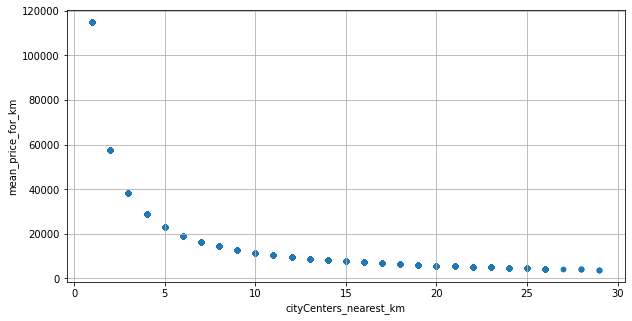

In [44]:
# Средняя цену каждого километра
distance['mean_price_for_km'] = flat_distance / distance['cityCenters_nearest_km']
distance.plot(x='cityCenters_nearest_km', y='mean_price_for_km', kind='scatter', figsize=(10, 5), grid=True)

***Вывод***

Наибольшая стоимость у км в центре города, чем дальше удаление от центра тем меньше стоимость.

### Общий вывод

Если обобщить все данные, то можно сделать вывод, что больше всего квартир продается в будние дни,1-3 комнатные квартиры, на любом, кроме первого этажа, с высотой потолка 2,6 м за цену около 4,5 млн. руб.
Увидели, что цена кв. зависет от этажа, района, от высоты потолка и от кол-ва комнат. 
Корреляция этих параметров в центре похоже и для всех квартир.

Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу
В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого
В центре есть очень дорогие однокомнатные квартиры
В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.
В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре (вероятно, перед Новым годом люди хотят сделать подарок)
Стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году. Это сложно объяснить, т.к. стоимость менее элитной недвижимости упала после обвала рубля в 2014 году
Общий вывод
Срок продажи квартиры

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.
Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод